<a href="https://colab.research.google.com/github/JoonJ14/hello-world/blob/main/BME_312_HW9_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 9 Solutions: Regression/Correlation**

#### Note: to clear the environment in R, do:
`rm(list=ls(all=TRUE))`

## **1. Outline the conditions required for linear regression analysis and contrast them with the conditions for linear correlation analysis.**

Correlation is used to examine the relationship between two variables. Regression is used to predict the value of a dependent variable from that of an independent variable.

## **2. A student undertakes a project to determine the effect of carbon dioxide on respiration rate using the following methodology. A volunteer inhaled air from a bag containing a predetermined amount of carbon dioxide (with partial pressure measured in torr) and the number of breaths per minute was recorded:**

> |  |  |  |  |  |  |  |  |  |  |  |  |
> :---:    | :---: | :---: | :---: | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  |
> **Partial pressure CO<sub>2</sub> <br> (torr)** | 30 |32 | 34  | 36 | 38 | 40 | 42 | 44 | 46 | 48 | 50 |
> **Respiration rate <br> (breaths/min)** | 8.1 | 8.0 | 9.9 | 11.2 | 11.0 | 13.2 | 14.6 | 16.6| 16.7| 18.3 | 18.2 |

### **a. Construct a scatterplot of these data using R. Does there appear to be a linear relationship between the partial pressure of CO2 and respiration rate?**
Yes.

### **b. Compute the linear regression equation so that Y may be predicted from X. Calculate b to 3 decimal places.**
For the population, the regression equation is:

$y = \alpha + \beta x$

We estimate that relationship using:

$\hat{y} = a + bx$, where $a$ and $b$ are estimates for $\alpha$ and $\beta$, respectively.

$b = L_{xy}/L_{xx} = \frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^{n}(x_i-\overline{x})^2} = \frac{253}{440} = 0.575$

$a = \overline{y} - b\overline{x} = -9.745$

### **c. Test the significance of this regression equation.**
There are two approaches here. We'll first use the $t$-test for the regression slope with the following hypotheses:

$H_0: \beta = 0$ and $H_1: \beta \neq 0$

For that, we need to compute the following test statistic:

$t = \frac{b}{\sqrt{(s_{y \cdot x}^2 / L_{xx})}}$, 

where $b = 0.575$, $L_{xx} = 440$, and $s_{y \cdot x}^2 = Res MS = \frac{Res SS}{n-2} = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{11-2} = \frac{4.05}{9} = 0.45$.

$\therefore t = \frac{b}{\sqrt{(s_{y \cdot x}^2 / L_{xx})}} = \frac{0.575}{\sqrt{(0.45 / 440)}} = 17.97$

For a two-sided test (we're testing whether our slope is either significantly greater than 0 or significantly less than 0), our critical $t$-values are:

$(t_{n-2, \frac{\alpha}{2}}, t_{n-2, 1-\frac{\alpha}{2}}) = (-2.26, 2.26)$

Because $17.97$ is outside this range, we can reject $H_0$ and conclude that partial pressure significantly predicts respiration rate.

Because $t > 0$, the $p$-value is given by:

$p = 2 \times P(t_{n-2} > 17.97) = 2.32 \times 10^{-8}$

Using the $F$-test approach:

$F = \frac{Reg_{MS}}{Res_{MS}}$, where

$Reg_{MS} = \frac{Reg_{SS}}{k} = \frac{\sum_{i=1}^{n}(\hat{y}_{i}-\overline{y})^2}{k}$ 

and 

$Res_{MS} = \frac{Res_{SS}}{n-k-1} = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n-k-1}$

For simple linear regression (only one independent variable), $k = 1$, leaving us with the following expressions for $Reg_{MS}$ and $Res_{MS}$:

$Reg_{MS} = \frac{\sum_{i=1}^{n}(\hat{y}_{i}-\overline{y})^2}{1} = \sum_{i=1}^{n}(\hat{y}_{i}-\overline{y})^2 = b \times L_{xy} = 0.575 \times 253 = 145.475$ 

and 

$Res_{MS} = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n-2} = \frac{Total_{SS}-Reg_{SS}}{n-2} = \frac{L_{yy}-{L_{xy}^2}/{L_{xx}}}{n-2} = \frac{149.5273-{253^2}/{440}}{11-2} = 0.450$

$\therefore F = \frac{Reg_{MS}}{Res_{MS}} = \frac{145.475}{0.45} = 323.0965$

Our critical $F$-value is given by $F_{1, n-2, 1-\alpha} = F_{1, 9, 0.95} = 5.12$

Because $323.10 > 5.12$, $H_0$ can be rejected.

The $p$-value is given by: $p = P(F_{1, 9} > 323.10) = 2.32 \times 10^{-8}$, which the same as for the $t$-test above.

[1] 0.575
[1] -9.745455
[1] TRUE
[1] 2.323023e-08
[1] TRUE
[1] 2.323023e-08
[1] 0.9728994



Call:
lm(formula = rr ~ pp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10455 -0.35455  0.09545  0.34545  1.04545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.74545    1.29546  -7.523 3.61e-05 ***
pp           0.57500    0.03199  17.975 2.32e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.671 on 9 degrees of freedom
Multiple R-squared:  0.9729,	Adjusted R-squared:  0.9699 
F-statistic: 323.1 on 1 and 9 DF,  p-value: 2.323e-08


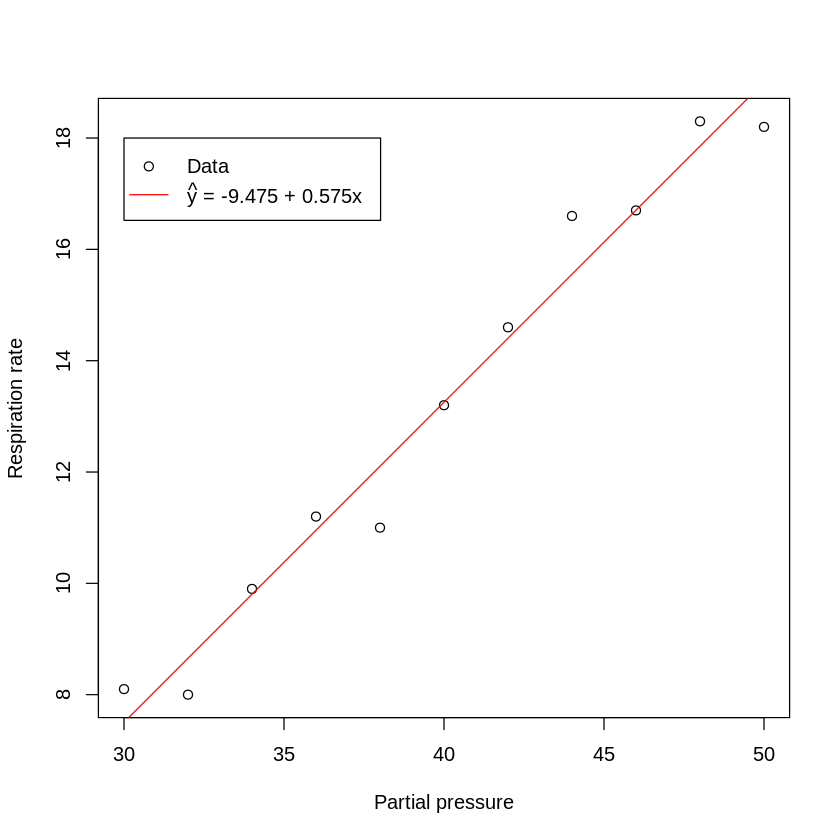

In [ ]:
# partial pressure
pp <- c(30, 32, 34 , 36, 38, 40, 42, 44, 46, 48, 50)

# respiration rate
rr <- c(8.1, 8.0, 9.9, 11.2, 11.0, 13.2, 14.6, 16.6, 16.7, 18.3, 18.2)

plot(pp, rr, xlab='Partial pressure', ylab='Respiration rate')

Lxy <- sum((pp-mean(pp))*(rr-mean(rr)))
Lxx <- sum((pp-mean(pp))^2)

b <- Lxy/Lxx
a <- mean(rr) - b*mean(pp)
print(b)
print(a)

# add regression line to plot
x <- pp
y_hat <- a + b*x
lines(x, y_hat, col='red')
legend <- c('Data', expression(hat(y) * ' = -9.475 + 0.575x'))
legend(30, 18, legend=legend, col=c('black', 'red'), lty=c(0, 1), pch=c(1, -1))

# test the significance of the slope b
ResSS <- sum((rr-y_hat)^2)
n <- length(rr)
s_xy <- sqrt(ResSS/(n-2))

t <- b / sqrt((s_xy^2)/Lxx)

alpha <- 0.05
t_critical <- c(qt(alpha/2, df=n-2), qt(1-alpha/2, df=n-2))
print(abs(t) > t_critical[2])

p <- 2 * pt(t, df=n-2, lower.tail=F)
print(p)

# test whether the explained variance is due to chance
Lyy <- sum((rr-mean(rr))^2)

RegMS <- sum((y_hat-mean(rr))^2)
ResMS <- (Lyy - (Lxy^2)/Lxx)/(n-2)

F_val <- RegMS / ResMS

F_critical <- qf(alpha, df1=1, df2=n-2, lower.tail=F)
print(F_val > F_critical)

p <- pf(F_val, df1=1, df2=n-2, lower.tail=F)
print(p)

# Note that the p-values are the same from both methods.

r_squared <- sum((y_hat-mean(rr))^2) / Lyy
print(r_squared)

# Finally, note that we can get most of the above statistics via the following code:
fit <- lm(rr ~ pp)
summary(fit)

## **3. A plant physiologist grew 13 individually potted soybean seedlings in a greenhouse. The table gives measurements of the total leaf area and total plant dry weight for each plant after 16 days of growth. Calculate the correlation coefficient for these data. Test its significance via a t-test. Interpret the result.**

> Plant # | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 |
> :---:    | :---: | :---: | :---: | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  | :---: | :---: 
> **Leaf area (cm<sup>2</sup>)** | 411 | 550 | 471 | 393 | 427 | 431 | 492 | 371 | 470 | 419 | 407 | 489 | 439
> **Dry weight (g)** | 2.00 | 2.46 | 2.11 | 1.89 | 2.05 | 2.30 | 2.46 | 2.06 | 2.25 | 2.07 | 2.17 | 2.32 | 2.12 

The correlation coefficient, $r$, is given by:

$r = \frac{L_{xy}}{\sqrt{L_{xx}L_{yy}}} = \frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i-\overline{x})^2\sum_{i=1}^n(y_i-\overline{y})^2}} = 0.815$, where we've let $x$ be leaf area and $y$ be leaf weight.

The test-statistic for corrleation coefficient is given by:

$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} = 4.66$

Our critical t-values are:

$(t_{n-2, \frac{\alpha}{2}}, t_{n-2, 1-\frac{\alpha}{2}}) = (t_{11, 0.025}, t_{11, 0.975}) = (-2.2, 2.2)$

and

$p = 2 * P(t_{11} > 4.66) = 0.0007 < 0.05$

$\therefore H_0$ can be rejected, and we conclude that there is a significant relationship between leaf area and it's dry weight.

[1] 0.8147143
[1] 4.659899
[1] -2.200985  2.200985
[1] 0.0006938291



	Pearson's product-moment correlation

data:  area and weight
t = 4.6599, df = 11, p-value = 0.0006938
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4785463 0.9425797
sample estimates:
      cor 
0.8147143 



Call:
lm(formula = weight ~ area)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14292 -0.07479 -0.02299  0.09830  0.16356 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.8812789  0.2789182    3.16 0.009085 ** 
area        0.0029122  0.0006249    4.66 0.000694 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1054 on 11 degrees of freedom
Multiple R-squared:  0.6638,	Adjusted R-squared:  0.6332 
F-statistic: 21.71 on 1 and 11 DF,  p-value: 0.0006938


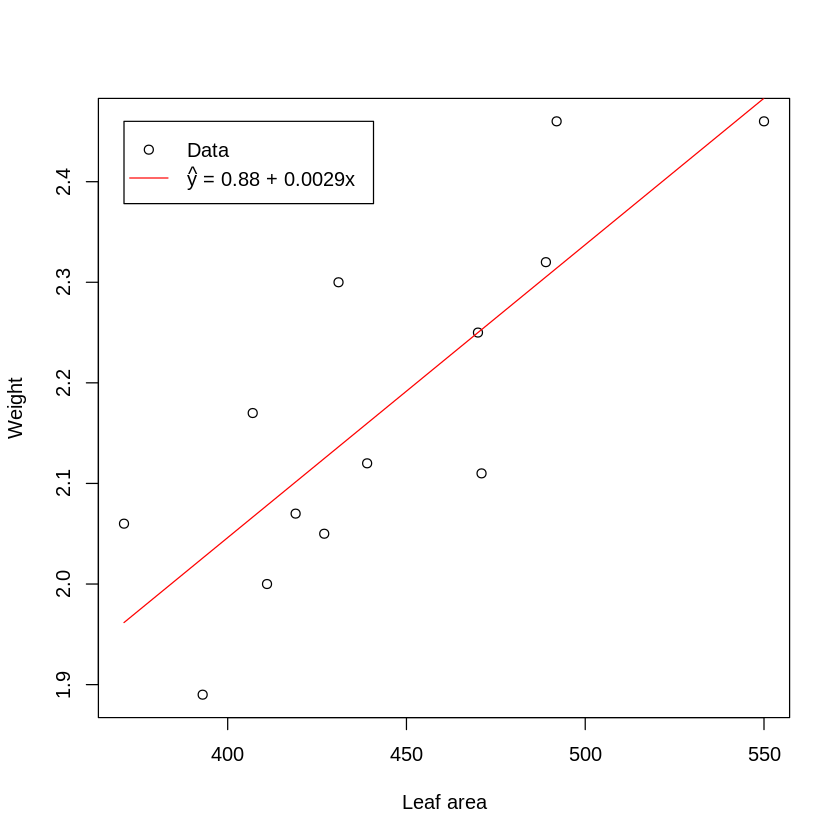

In [ ]:
area <- c(411, 550, 471, 393, 427, 431, 492, 371, 470, 419, 407, 489, 439)
weight <- c(2.00, 2.46, 2.11, 1.89, 2.05, 2.30, 2.46, 2.06, 2.25, 2.07, 2.17, 2.32, 2.12)
plot(area, weight, xlab='Leaf area', ylab='Weight')

Lxy <- sum((area-mean(area))*(weight-mean(weight)))
Lxx <- sum((area-mean(area))^2)
Lyy <- sum((weight-mean(weight))^2)

r <- Lxy / sqrt(Lxx*Lyy)
print(r)

n <- length(area)
t <- r*sqrt(n-2) / sqrt(1-r^2)
print(t)

alpha <- 0.05
t_critical <- c(qt(alpha/2, df=n-2), qt(1-alpha/2, df=n-2))
print(t_critical)

p <- 2 * pt(t, df=n-2, lower.tail=F)
print(p)

cor.test(area, weight)

# running the simple linear regression
fit <- lm(weight ~ area)
summary(fit)
x <- area
a <- fit$coefficients[1]
b <- fit$coefficients[2]
y_hat <- a + b*x
lines(x, y_hat, col='red')
legend <- c('Data', expression(hat(y) * ' = 0.88 + 0.0029x'))
legend(min(area), max(weight), legend=legend, col=c('black', 'red'), lty=c(0, 1), pch=c(1, -1))

## **4. You are on a quest to find a new drug to help students stay awake during BME 312. You have developed StatEnergy, which can be added to a liquid beverage of their choice. Ten brave students in the class try various dosages of StatEnergy and report how many minutes they stay awake during BME 312:** 

> |  |  |  |  |  |  |  |  |  |  |  |
> :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: 
> **StatEnergy (mL)** | 0.19 | 0.66 | 0.96 | 0.91 | 0.51 | 0.78 | 0.35 | 0.82 | 0.08 | 0.22 
> **Minutes awake** | 11 | 52 | 62 | 63 | 55 | 37 | 12 | 77 | 1 | 31 

### **a. Is there evidence that StatEnergy is effective?**

To examine this, we will compute the regression equation and test whether it's slope is significantly different from 0.

$b = L_{xy}/L_{xx} = \frac{\sum_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^{n}(x_i-\overline{x})^2} = \frac{64.66}{0.937} = 69.04$

$a = \overline{y} - b\overline{x} = 2.265$

$\hat{y} = 2.265 + 69.04x$

Using the $t$-test for the regression slope with the following hypotheses:

$H_0: \beta = 0$ and $H_1: \beta \neq 0$, our test statistic is:

$t = \frac{b}{\sqrt{(s_{y \cdot x}^2 / L_{xx})}}$, 

where $b = 69.04$, $L_{xx} = 0.937$, and $s_{y \cdot x}^2 = Res MS = \frac{Res SS}{n-2} = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{10-2} = \frac{1522.51}{8} = 190.31$.

$\therefore t = \frac{b}{\sqrt{(s_{y \cdot x}^2 / L_{xx})}} = \frac{69.04}{\sqrt{(190.31 / 0.937)}} = 4.84$

For a two-sided test (we're testing whether our slope is either significantly greater than 0 or significantly less than 0), our critical $t$-values are:

$(t_{n-2, \frac{\alpha}{2}}, t_{n-2, 1-\frac{\alpha}{2}}) = (-2.26, 2.26)$

Because $4.84$ is outside this range, we can reject $H_0$ and conclude that partial pressure significantly predicts respiration rate.

Because $t > 0$, the $p$-value is given by:

$p = 2 \times P(t_{n-2} > 4.84) = 0.0013 < 0.05$

### **b. How many minutes will students stay awake if a student had 0.38 mL of StatEnergy?**

Our regression equation is:

$\hat{y} = 2.265 + 69.04x$, where $x$ is StatEnergy in mL and $\hat{y}$ is minutes awake.

For $x = 0.38$ mL, $\hat{y} = 28.5$ min.

### **c. How much StatEnergy will the student need to consume to stay awake for at least first 45 minutes of the class?**

For $\hat{y} = 45$ min, $x = 0.62$ mL. 

However, this is not strictly correct. In order to do this correctly, we'd have to compute the regression coefficients for mL as a function of minutes awake, as the minimization criteria is different (i.e. we're minimizing the sum-squared error along mL rather than minutes awake). If we do that using R, we get the following regression equation:

$\hat{y} = 0.1149 + 0.0108x$, where $x$ is now minutes awake and $\hat{y}$ is now StatEnergy in mL.

For $x = 45$ min, $\hat{y} = 0.60$ mL.

[1] 64.66200  0.93656 69.04203  2.26497
[1] 1522.505
[1] 190.3131
[1] 4.843363
[1] -2.306004  2.306004
[1] 0.001282631



Call:
lm(formula = min ~ mL)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.118  -6.728  -3.238  11.201  18.121 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.265      8.947   0.253  0.80654   
mL            69.042     14.255   4.843  0.00128 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.8 on 8 degrees of freedom
Multiple R-squared:  0.7457,	Adjusted R-squared:  0.7139 
F-statistic: 23.46 on 1 and 8 DF,  p-value: 0.001283


[1] 28.50094
[1] 0.6189713



Call:
lm(formula = mL ~ min)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22972 -0.10633 -0.03011  0.11237  0.26548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.11490    0.10475   1.097  0.30463   
min          0.01080    0.00223   4.843  0.00128 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1725 on 8 degrees of freedom
Multiple R-squared:  0.7457,	Adjusted R-squared:  0.7139 
F-statistic: 23.46 on 1 and 8 DF,  p-value: 0.001283


(Intercept) 
  0.6009228 


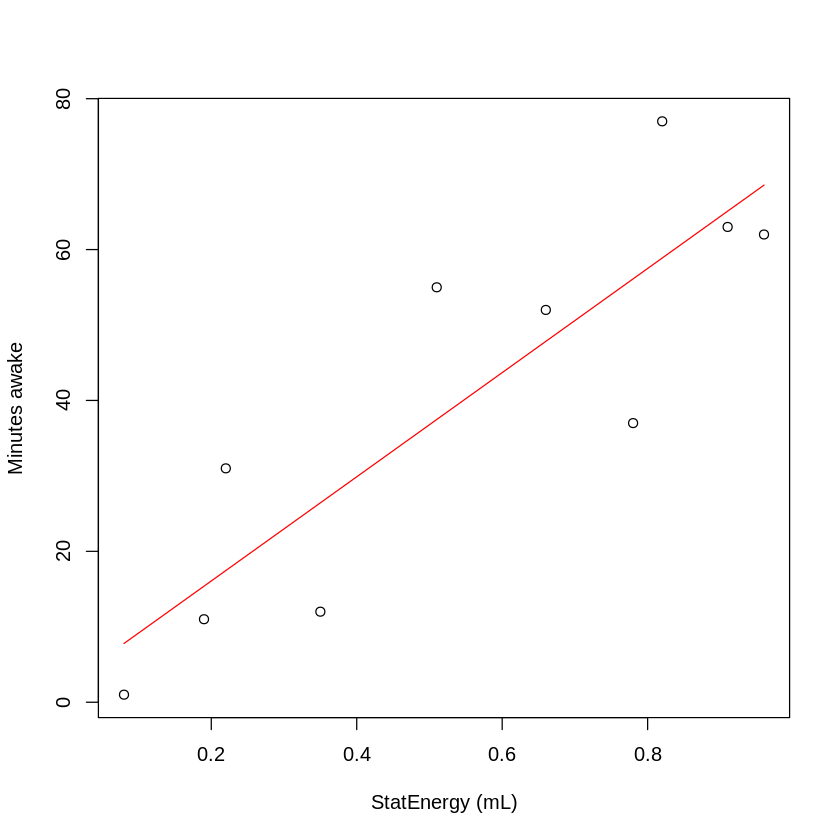

In [ ]:
# a

# partial pressure
mL <- c(0.19, 0.66, 0.96, 0.91, 0.51, 0.78, 0.35, 0.82, 0.08, 0.22)

# respiration rate
min <- c(11, 52, 62, 63, 55, 37, 12, 77, 1, 31)

plot(mL, min, xlab='StatEnergy (mL)', ylab='Minutes awake')

Lxy <- sum((mL-mean(mL))*(min-mean(min)))
Lxx <- sum((mL-mean(mL))^2)

b <- Lxy/Lxx
a <- mean(min) - b*mean(mL)

print(c(Lxy, Lxx, b, a))

# add regression line to plot
x <- mL # seq(0, 1, 0.01)
y_hat <- a + b*x
lines(x, y_hat, col='red')

# test the significance of the slope b
ResSS <- sum((min-y_hat)^2)
print(ResSS)
n <- length(min)
s_xy <- sqrt(ResSS/(n-2))
print(s_xy^2)

t <- b / sqrt((s_xy^2)/Lxx)
print(t)

alpha <- 0.05
t_critical <- c(qt(alpha/2, df=n-2), qt(1-alpha/2, df=n-2))
print(t_critical)

p <- 2 * pt(t, df=n-2, lower.tail=F)
print(p)

fit <- lm(min ~ mL)
summary(fit)

# b
y <- a + b*0.38
print(y)

# c
x <- (45 - a) / b
print(x)

# c, correct
fit <- lm(mL ~ min)
summary(fit)
a <- fit$coefficients[1]
b <- fit$coefficients[2]

y <- a + b*45
print(y)

## **5. One of the most common screening tests for epithelial ovarian cancer involves the use of biomarkers. Biomarkers have been applied in the management of epithelial ovarian cancer in several different ways, including predicting primary disease at an early stage, distinguishing malignant from benign pelvic masses, monitoring responses to treatment, and estimating prognosis. A number of proteins present in either blood or urine have been identified as specific markers for epithelial ovarian cancer. Let’s say that you collected data from patients on two of these biomarkers (A and B):** 

> |  |  |  |  |  |  |  |  |  |  |  |
> :---:    | :---: | :---: | :---: | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  | :---:  |
> **Biomarker A** | 0.08 | 0.19 | 0.22 | 0.35 | 0.51 | 0.66 | 0.78 | 0.82 | 0.91 | 0.96 |
> **Biomarker B** | 2.02 | 2.16 | 2.39 | 2.47 | 2.17 | 2.67 | 2.90 | 2.41 | 2.13 | 3.66 |

### **Examine the correlation among the preoperative serum levels of the two biomarkers presumed to be useful for early detection of epithelial ovarian cancer.**

The correlation coefficient, $r$, is given by:

$r = \frac{L_{xy}}{\sqrt{L_{xx}L_{yy}}} = \frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i-\overline{x})^2\sum_{i=1}^n(y_i-\overline{y})^2}} = 0.587$, where we've let $x$ be Biomarker A and $y$ be Biomarker B.

The test-statistic for corrleation coefficient is given by:

$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} = 2.05$

Our critical t-values are:

$(t_{n-2, \frac{\alpha}{2}}, t_{n-2, 1-\frac{\alpha}{2}}) = (t_{8, 0.025}, t_{8, 0.975}) = (-2.31, 2.31)$

and

$p = 2 * P(t_{8} > 2.05) = 0.0745 \nless 0.05$

$\therefore H_0$ **_cannot_** be rejected.

[1] 0.5868658
[1] 2.050067
[1] -2.306004  2.306004
[1] 0.0745004



	Pearson's product-moment correlation

data:  A and B
t = 2.0501, df = 8, p-value = 0.0745
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06782067  0.88827064
sample estimates:
      cor 
0.5868658 


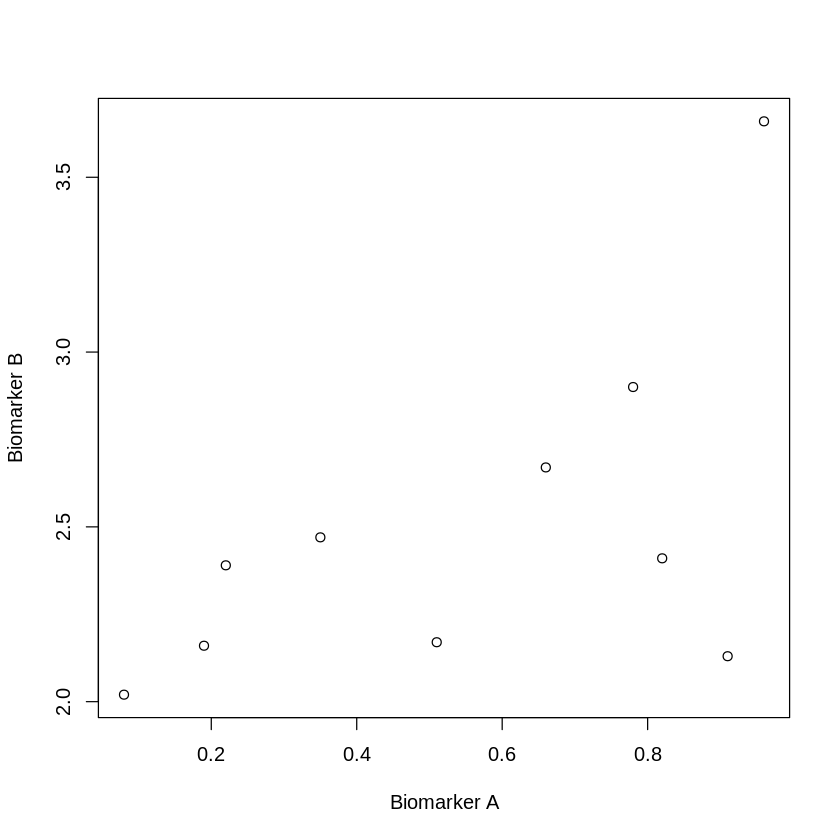

In [ ]:
A <- c(0.08, 0.19, 0.22, 0.35, 0.51, 0.66, 0.78, 0.82, 0.91, 0.96)
B <- c(2.02, 2.16, 2.39, 2.47, 2.17, 2.67, 2.90, 2.41, 2.13, 3.66)
plot(A, B, xlab='Biomarker A', ylab='Biomarker B')

Lxy <- sum((A-mean(A))*(B-mean(B)))
Lxx <- sum((A-mean(A))^2)
Lyy <- sum((B-mean(B))^2)

r <- Lxy / sqrt(Lxx*Lyy)
print(r)

n <- length(A)
t = r*sqrt(n-2) / sqrt(1-r^2)
print(t)

alpha <- 0.05
t_critical <- c(qt(alpha/2, df=n-2), qt(1-alpha/2, df=n-2))
print(t_critical)

p <- 2 * pt(t, df=n-2, lower.tail=F)
print(p)

cor.test(A, B)